In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


df=pd.read_csv("pca_features_1.txt", delimiter=',', header=None, skiprows=0,
names=['Feature_name_1','Feature_name_2','Feature_name_3','Feature_name_4','Value'])


labe_Enc = LabelEncoder()                   #array or object declared to label encoder library
labe_Enc.fit(df['Feature_name_1'].astype(str))   #fitting of first column into le in form of string
df['Feature_name_1'] = labe_Enc.transform(df['Feature_name_1'].astype(str)) #transform column and replace old with new

labe_Enc.fit(df['Feature_name_2'].astype(str))  #fitting  of  second column into le  in form of string
df['Feature_name_2'] = labe_Enc.transform(df['Feature_name_2'].astype(str)) #transform column and replace old with new

labe_Enc.fit(df['Feature_name_3'].astype(str))   #fitting  of  third column into le  in form of string
df['Feature_name_3'] = labe_Enc.transform(df['Feature_name_3'].astype(str))#transform column and replace old with new

labe_Enc.fit(df['Feature_name_4'].astype(str)) #fitting  of  fourth column into le  in form of string
df['Feature_name_4'] = labe_Enc.transform(df['Feature_name_4'].astype(str)) #transform column and replace old with new



features = ['Feature_name_1','Feature_name_2','Feature_name_3','Feature_name_4']# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['Value']].values  #assigning the target values to variable
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=4)  #number of components 
principalComponents = pca.fit_transform(x) # fitting and transforming features 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2','principal component 3','principal component 4'])
principalDf  #dataframe(2-D structure) output

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.055326,-1.430113,1.223776,-0.701268
1,-1.664790,0.608172,0.282798,-0.135379
2,1.388828,0.044800,1.413432,1.029048
3,-1.348095,0.393541,0.100255,1.091741
4,-0.157506,-1.001594,1.154421,-0.903108
...,...,...,...,...
1144,0.263253,-0.886652,0.872577,-0.154499
1145,1.037275,-0.631854,0.156965,0.504037
1146,1.072793,-1.263259,-0.461944,-0.414103
1147,-0.939544,-0.730400,-1.873920,1.463278


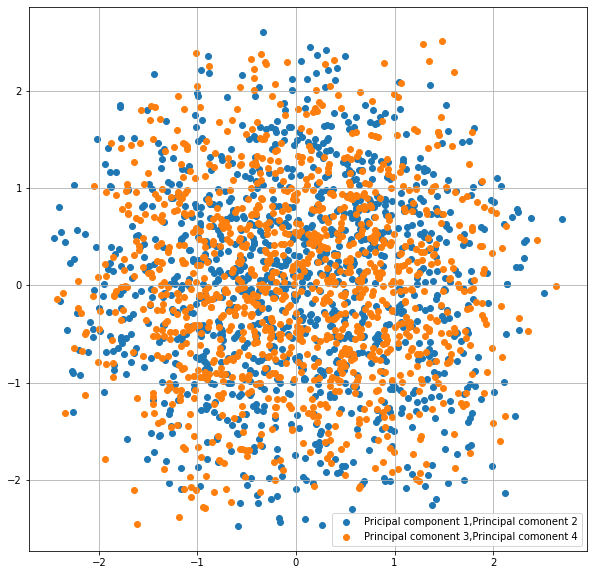

In [3]:
pc1 = []  #new array or new list
pc1.append([principalDf['principal component 1']])   #entering first column of dataframe into new aray

pc2 = []   #new array or new list
pc2.append([principalDf['principal component 2']]) #entering second column of dataframe into new aray

pc3 = []   #new array or new list
pc3.append([principalDf['principal component 3']])  #entering third column of dataframe into new aray

pc4 = []   #new array or new list
pc4.append([principalDf['principal component 4']])  #entering fourth column of dataframe into new aray


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)   
t = ['Pricipal component 1,Principal comonent 2','Principal comonent 3,Principal comonent 4']
ax.grid()
ax.scatter(pc1,pc2)  #plotting collection of point of first two column
ax.scatter(pc3,pc4)   # plotting collection of point of last two column

ax.legend(t)
plt.show()

In [4]:
string_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in principalDf.iteritems():
    if type(colvalue[1]) == str: #matching type as string 
         string_list.append(colname)
# Get to the numeric columns by inversion            
num_list = principalDf.columns.difference(string_list)

movie_num = principalDf[num_list]
#del movie # Get rid of movie df as we won't need it now
movie_num.head() #printing top 5 rows

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.055326,-1.430113,1.223776,-0.701268
1,-1.664790,0.608172,0.282798,-0.135379
2,1.388828,0.044800,1.413432,1.029048
3,-1.348095,0.393541,0.100255,1.091741
4,-0.157506,-1.001594,1.154421,-0.903108


In [0]:
movie_num = movie_num.fillna(value=0, axis=1)

X = movie_num.values
# Normalize the data for mean and variance
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)  #to make it easy for mean and variance
principalDf.plot(y= 'principal component 2', x ='principal component 1',kind='hexbin',gridsize=25, sharex=False, colormap='cubehelix', title='Hexbin of principal component')
principalDf.plot(y= 'principal component 4', x ='principal component 3',kind='hexbin',gridsize=25, sharex=False, colormap='cubehelix', title='Hexbin of principal component')

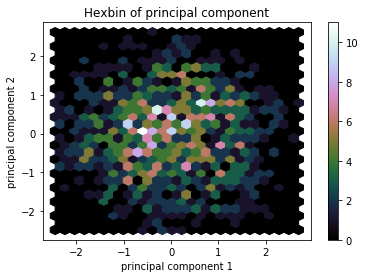

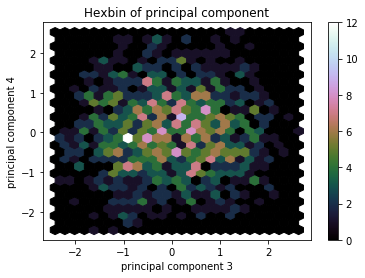

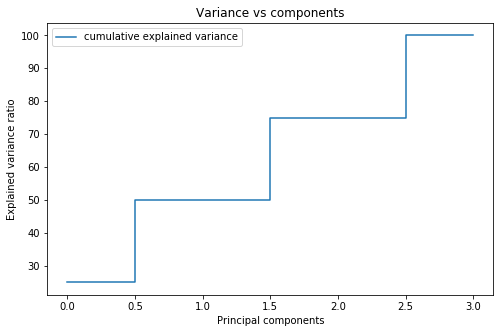

In [0]:
mean_vector = np.mean(X_std, axis=0) #mean 
cov_matrix = np.cov(X_std.T)  #covariance
eigen_value, eigen_vector = np.linalg.eig(cov_matrix)  # to find eigenvalue and eigenvector

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eigen_value[i]),eigen_vector[:,i]) for i in range(len(eigen_value))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= False)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eigen_value) #sum of eigenvalue
var_exp = [(i/tot)*100 for i in sorted(eigen_value, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
temp = cum_var_exp

# plt.bar(range(4), var_exp, alpha=0.333, align='center', label='individual explained variance', color = 'g')
plt.step(range(4), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance vs components')
plt.legend(loc='best')
plt.show()

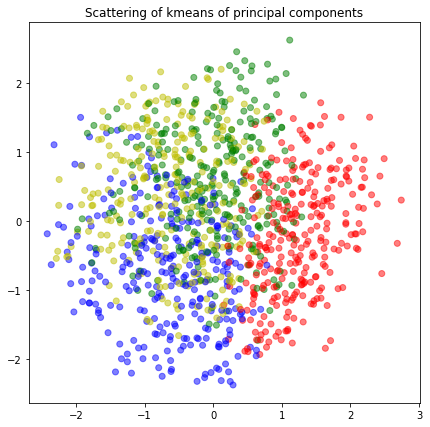

In [0]:
# number of cluster = 4
x_n4d = pca.fit_transform(X_std)  # to fit and transform it to give normalized value
kmeans = KMeans(n_clusters=4)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_n4d) # find cluster indices and center

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered] #to asign each cluster a colour

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_n4d[:,0],x_n4d[:,3], c= label_color, alpha=0.5) 
plt.title('Scattering of kmeans of principal components')
plt.show()

/home/dhruvil/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/dhruvil/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


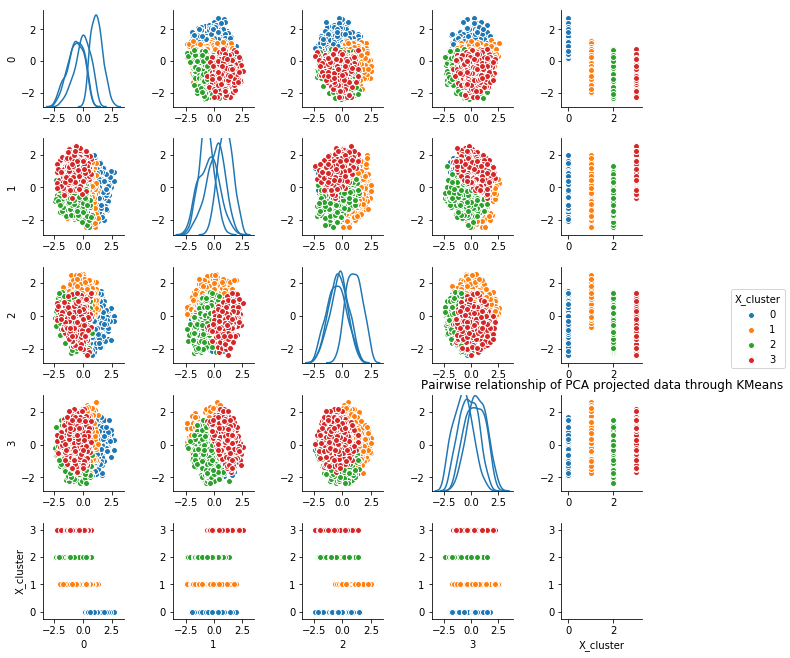

In [0]:
df = pd.DataFrame(x_n4d) #dataframe
df = df[[0,1,2,3]] #  visualise relationships between first 4 columns
df['X_cluster'] = X_clustered  #assigning  variable
#  Seaborn's pairplot  is called to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster',diag_kind='kde',size=1.85) #plot pairwise relationship
plt.title('Pairwise relationship of PCA projected data through KMeans')
plt.show() #showing the plot